In [1]:
import numpy as np
import networkx as nx
import community.community_louvain as community
# https://stackoverflow.com/questions/53017174/attributeerror-module-networkx-algorithms-community-has-no-attribute-best-pa

In [2]:
g = nx.read_edgelist('allcites.txt')

In [3]:
g.number_of_nodes()

25417

In [4]:
#Need to find the largest connected component from `g` and continue.
lcc = max(nx.connected_components(g), key=len)

In [5]:
len(lcc)

25389

In [6]:
type(lcc)

set

In [7]:
lcc_sg = g.subgraph(lcc).copy()

In [8]:
lcc_sg.number_of_nodes()

25389

In [9]:
#Community detection using the Louvian method.
bp = community.best_partition(lcc_sg)
#mapping between each node and the communnity detected using the Louvain method.

In [10]:
type(bp)

dict

In [11]:
#Modularity between bp and g.
#community.modularity(bp, g)

In [12]:
#The idx of each community.
cidx = list(set(bp.values()))
cidx

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [13]:
'1947' in list(g.nodes)

True

In [14]:
# list(g.nodes) #list of strings that represent node idx.

In [15]:
# Create a list of lists, where each list is the 
#nlist = [[i for i in list(g.nodes) if bp[i] == cid] for cid in cidx]

nlist = []
for cid in cidx:
    ilist = []
    for i in list(g.nodes):
        try:
            if bp[i] == cid:
                ilist.append(i)
        except:
            pass
    nlist.append(ilist)

In [16]:
qg = nx.quotient_graph(g, nlist)

In [17]:
qg.number_of_nodes()

14

In [18]:
community_nodes = list(qg.nodes)

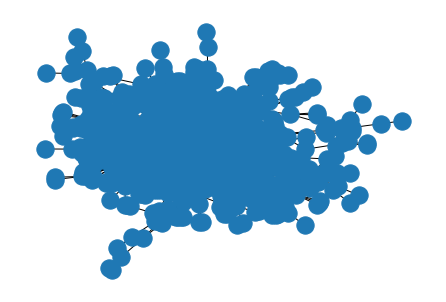

In [19]:
nx.draw(qg.nodes[community_nodes[10]]['graph'])

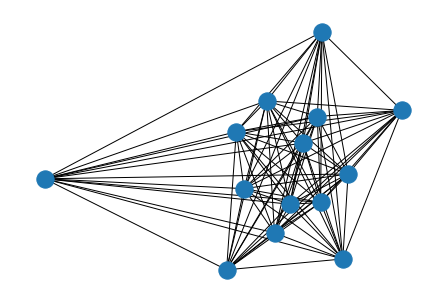

In [20]:
#For homework assignment, you need to remove all the outer nodes.
nx.draw(qg)

In [21]:
#%matplotlib auto
#nx.draw(qg)

In [22]:
qg.edges[community_nodes[0], community_nodes[10]]
#Determine cartesian product to get all weights.

{'weight': 319}

In [65]:
from itertools import product

cart_product = [(a, b) for a, b in product([i for i in range(0, 14)], [i for i in range(0, 14)])]
len(cart_product)

196

In [79]:
results = []
for each in cart_product:
    try:
        results_dict = dict()
        results_dict['weight'] = qg.edges[community_nodes[each[0]], community_nodes[each[1]]]['weight']
        results_dict['node_1'] = each[0]
        results_dict['node_2'] = each[1]
        results.append(results_dict)
    except:
        pass
#TODO: Overlay edges, based on weights onto the graph, `nodes`.
results[:5]
#https://stackoverflow.com/questions/62935983/vary-thickness-of-edges-based-on-weight-in-networkx

[{'weight': 512, 'node_1': 0, 'node_2': 1},
 {'weight': 1780, 'node_1': 0, 'node_2': 2},
 {'weight': 699, 'node_1': 0, 'node_2': 3},
 {'weight': 949, 'node_1': 0, 'node_2': 4},
 {'weight': 327, 'node_1': 0, 'node_2': 5}]

In [80]:
qg_list_of_subgraphs = [qg.nodes[community_nodes[each]] for each in cidx]

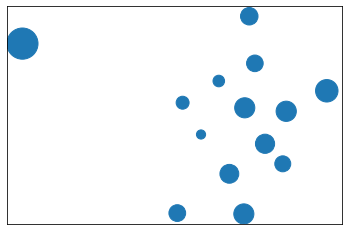

In [37]:
nodes = nx.draw_networkx_nodes(qg, 
                               pos=nx.spring_layout(qg), 
                               node_size=[each['density']*45000 for each in qg_list_of_subgraphs])

In [39]:
import numpy as np

A = np.array([[0,0,1,0], 
              [0,0,1,1], 
              [1,1,0,1], 
              [0,1,1,0]])

v = np.array([1, 0, 0, 0]).reshape(4, 1)

In [48]:
from numpy.linalg import matrix_power

np.matmul(matrix_power(A, 10), v)

# Starting from node 1, there are zero ways to reach node 1, 
# 1 way to reach node 2, three ways to reach node 3 and 1 way to reach node 4.
# Represents how accessible each node is in a purly random movement. 
# Key idea in eigenvector centrality. 

array([[197],
       [349],
       [380],
       [349]])

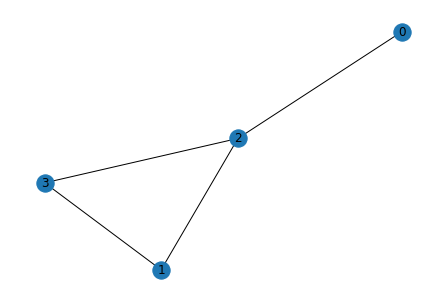

In [47]:
G = nx.from_numpy_array(A)
nx.draw(G, with_labels=True)

In [54]:
np.linalg.eig(A)[1][:,2].reshape(4, 1)

array([[0.2818452 ],
       [0.52272073],
       [0.61162846],
       [0.52272073]])

In [53]:
nx.eigenvector_centrality_numpy(nx.from_numpy_array(A))

{0: 0.28184519885486825,
 1: 0.5227207256439814,
 2: 0.6116284573553774,
 3: 0.5227207256439816}

In [ ]:
# What is transitive closure of a graph.

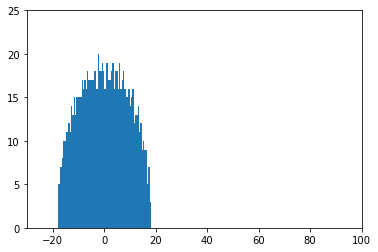

In [106]:
dim = 1000
A = np.zeros([dim, dim])
for i in range(dim-1):
    for j in range(1, dim):
        r = np.random.random()
        A[i, j]=r
        A[j, i]=r
eig_A = np.linalg.eigvals(A) #only has real eigenvalues.
plt.hist(eig_A, bins=1000)
plt.axis([-30, 100, 0, 25])
plt.show()

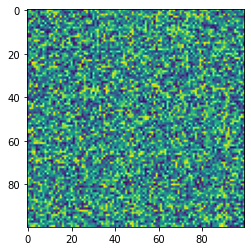

In [88]:
import matplotlib.pyplot as plt
plt.imshow(A)
plt.show()